In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = None

# 1 Data for Feature Engineering
First we ingested the Market Check Used Car Inventory data file containing used cars accross United States (~6.7 million instances with 38 features
Then we did initial data wraggling in SQLite and Alteryx (Removed columns with null values, single values, huge descriptive text values. Also instances with null values and 4 digit zipcodes

In [2]:
# Read in CSV file
#car_data_clean = pd.read_csv(r'C:\Users\yexin\Desktop\KBB\car_data_clean_final.csv')
car_data_clean = pd.read_csv(r'C:\Users\yexin\Desktop\KBB\NewCarData_clean.csv')


In [3]:
# Check in the initial data set
print(car_data_clean.shape)

(336511, 51)


In [4]:
feature_df= car_data_clean.drop (car_data_clean.columns[0], axis =1)
feature_df.shape

(336511, 50)

In [5]:
#Converting Currencty to Numberic features

feature_df['Median Family income Num']= (feature_df['Median Family income'].replace ( '[\$,)]','', regex=True )
                                     .replace( '[(]','-',   regex=True ).astype(float))
feature_df['Per Capita income Num']= (feature_df['Per Capita income'].replace ( '[\$,)]','', regex=True )
                                    .replace( '[(]','-',   regex=True ).astype(float))

feature_df['Median Household income Num']= (feature_df['Median Household income'].replace ( '[\$,)]','', regex=True )
                                    .replace( '[(]','-',   regex=True ).astype(float))

In [6]:
feature_df.head()

,vin,price,miles,year,make,model,trim,vehicle_type,body_type,drivetrain,fuel_type,engine,engine_size,transmission,doors,cylinders,interior_color,exterior_color,scraped_at,status_date,zip,is_certified,dom,dom_180,msrp,dom_active,Rank,County,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,States Short,States,Regions,type,decommissioned,primary_city,state,county,timezone,latitude,longitude,irs_estimated_population_2015,county full,YEAR,AGE,Median Family income Num,Per Capita income Num,Median Household income Num
0,1GTP6DE12G1234957,31500.000,44360.000,2016.000,GMC,Canyon,SLT,Truck,Pickup,4-Wheel Drive,Diesel,2.8L L4 DOHC 24V TURBO DIESEL,2.800,Automatic,4.000,4.000,JET BLACK,Summit White,2018-09-13T10:24:47Z,2018-11-10T05:16:06Z,64730,1.000,89,13,34852.000,0,2079,Bates,MO,"$21,047.00","$38,579.00","$50,469.00",16878,6832,Missouri,MO,Missouri,MidWest,STANDARD,0,Butler,MO,Bates,America/Chicago,38.250,-94.330,5800,Bates County,2016,3,50469.000,21047.000,38579.000
1,2C3CCAKG3GH325272,22500.000,35195.000,2016.000,Chrysler,300,C,Car,Sedan,All Wheel Drive,Regular Unleaded,3.6L V6 SOHC 24V,3.600,Automatic,4.000,6.000,BLACK,Billet Silver Metallic Clearcoat,2018-10-25T14:21:05Z,2018-11-10T05:19:43Z,64730,1.000,138,70,22500.000,70,2079,Bates,MO,"$21,047.00","$38,579.00","$50,469.00",16878,6832,Missouri,MO,Missouri,MidWest,STANDARD,0,Butler,MO,Bates,America/Chicago,38.250,-94.330,5800,Bates County,2016,3,50469.000,21047.000,38579.000
2,JTDKARFU6G3504811,21600.000,16513.000,2016.000,Toyota,Prius,Four,Car,Hatchback,Front Wheel Drive,Regular Unleaded,1.8L L4 DOHC 16V HYBRID,1.800,Automatic,4.000,4.000,MOONSTONE,White,2018-10-21T08:38:22Z,2018-11-10T16:11:40Z,43110,1.000,60,22,21600.000,22,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000
3,5J6RM4H97GL054923,26057.000,25162.000,2016.000,Honda,CR-V,Touring,SUV,SUV,All Wheel Drive,Regular Unleaded,2.4L L4 DOHC 16V,2.400,Automatic,4.000,4.000,Black,White Diamond Pearl,2018-10-30T06:44:29Z,2018-11-10T16:50:53Z,43110,1.000,152,73,26057.000,73,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000
4,1G11C5SA1GF111025,15475.000,32865.000,2016.000,Chevrolet,Malibu Limited,LT,Car,Sedan,Front Wheel Drive,Regular Unleaded,2.5L L4 DOHC 16V,2.500,Automatic,4.000,4.000,JET BLACK,Silver Ice,2018-10-20T04:54:05Z,2018-11-10T17:36:51Z,43110,1.000,23,23,15475.000,23,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000


# Data Visualization
Performed exploratory data analysis to better understand how data is distributed

### EDA1: Price of used car distributed
With this information above we can see that the prices are skewed right. Most of the price are around 200,000 and some outliers lies above 300,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`Price Fs`) for machine learning.

In [13]:
feature_df.columns

Index(['vin', 'price', 'miles', 'year', 'make', 'model', 'trim',
       'vehicle_type', 'body_type', 'drivetrain', 'fuel_type', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'scraped_at', 'status_date', 'zip', 'is_certified',
       'dom', 'dom_180', 'msrp', 'dom_active', 'Rank', 'County', 'State short',
       'Per Capita income', 'Median Household income', 'Median Family income',
       'Population', 'Number of households', 'State full', 'States Short',
       'States', 'Regions', 'type', 'decommissioned', 'primary_city', 'state',
       'county', 'timezone', 'latitude', 'longitude',
       'irs_estimated_population_2015', 'county full', 'YEAR', 'AGE',
       'Median Family income Num', 'Per Capita income Num',
       'Median Household income Num'],
      dtype='object')

In [8]:
feature_df ['price'].describe()

count   336511.000
mean     26400.023
std      13207.210
min        348.000
25%      17989.000
50%      23963.000
75%      31663.000
max     999995.000
Name: price, dtype: float64

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


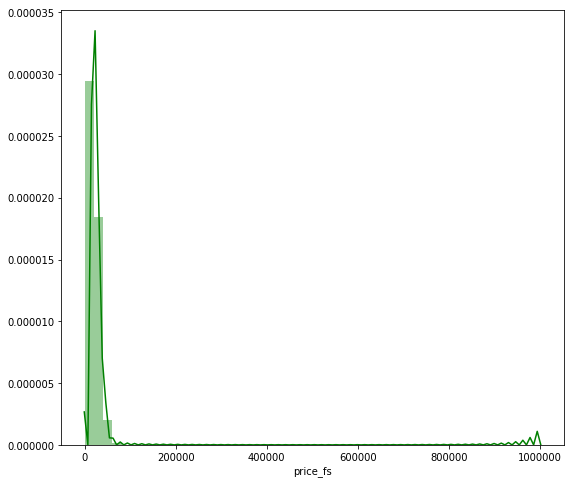

In [11]:
plt.figure(figsize=(9, 8))
sns.distplot(feature_df['price_fs'], color='g', bins=50)

In [16]:
#obviously, we have outerlier of car price. So we need to remove outliers

In [26]:
ol = (feature_df['price'] < 100000) 

In [27]:
feature_df = feature_df[ol]

In [28]:
# outterlier is removed
feature_df.shape

(335590, 53)

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


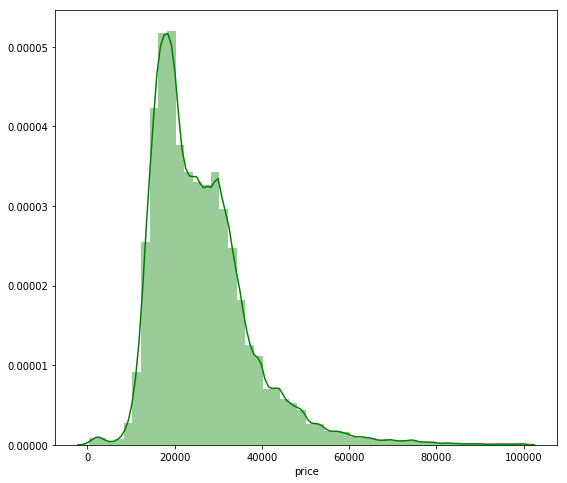

In [29]:
# so  now the car price distribution looks more even
plt.figure(figsize=(9, 8))
sns.distplot(feature_df['price'], color='g', bins=50)

In [31]:
feature_df.columns

Index(['vin', 'price', 'miles', 'year', 'make', 'model', 'trim',
       'vehicle_type', 'body_type', 'drivetrain', 'fuel_type', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'scraped_at', 'status_date', 'zip', 'is_certified',
       'dom', 'dom_180', 'msrp', 'dom_active', 'Rank', 'County', 'State short',
       'Per Capita income', 'Median Household income', 'Median Family income',
       'Population', 'Number of households', 'State full', 'States Short',
       'States', 'Regions', 'type', 'decommissioned', 'primary_city', 'state',
       'county', 'timezone', 'latitude', 'longitude',
       'irs_estimated_population_2015', 'county full', 'YEAR', 'AGE',
       'Median Family income Num', 'Per Capita income Num',
       'Median Household income Num'],
      dtype='object')

In [32]:
feature_df.dtypes

vin                               object
price                            float64
miles                            float64
year                             float64
make                              object
model                             object
trim                              object
vehicle_type                      object
body_type                         object
drivetrain                        object
fuel_type                         object
engine                            object
engine_size                      float64
transmission                      object
doors                            float64
cylinders                        float64
interior_color                    object
exterior_color                    object
scraped_at                        object
status_date                       object
zip                                int64
is_certified                     float64
dom                                int64
dom_180                            int64
msrp            

### EDA2: Numerical Data Distribution
Features such as 'Miles Fs' seems to share a similar distributon to the one we have with 'Price Fs'.  Let see if we can find new clue later.

In [33]:
df_num = feature_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,price,miles,year,engine_size,doors,cylinders,zip,is_certified,dom,dom_180,msrp,dom_active,Rank,Population,Number of households,decommissioned,latitude,longitude,irs_estimated_population_2015,YEAR,AGE,Median Family income Num,Per Capita income Num,Median Household income Num
0,31500.000,44360.000,2016.000,2.800,4.000,4.000,64730,1.000,89,13,34852.000,0,2079,16878,6832,0,38.250,-94.330,5800,2016,3,50469.000,21047.000,38579.000
1,22500.000,35195.000,2016.000,3.600,4.000,6.000,64730,1.000,138,70,22500.000,70,2079,16878,6832,0,38.250,-94.330,5800,2016,3,50469.000,21047.000,38579.000
2,21600.000,16513.000,2016.000,1.800,4.000,4.000,43110,1.000,60,22,21600.000,22,461,1181824,468295,0,39.840,-82.820,34950,2016,3,64693.000,28283.000,50877.000
3,26057.000,25162.000,2016.000,2.400,4.000,4.000,43110,1.000,152,73,26057.000,73,461,1181824,468295,0,39.840,-82.820,34950,2016,3,64693.000,28283.000,50877.000
4,15475.000,32865.000,2016.000,2.500,4.000,4.000,43110,1.000,23,23,15475.000,23,461,1181824,468295,0,39.840,-82.820,34950,2016,3,64693.000,28283.000,50877.000


In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

NameError: name 'df_num' is not defined

### EDA3: Median Family Income and Car Price

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


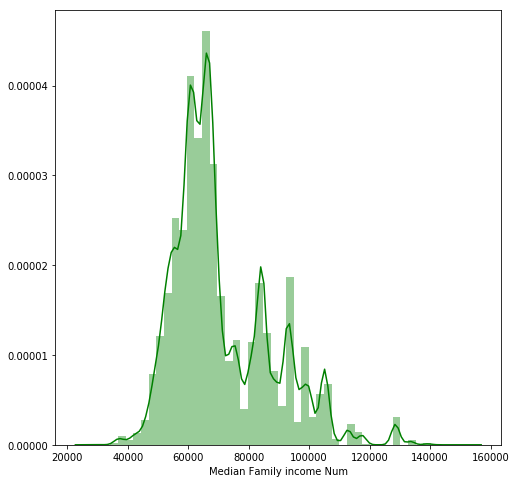

In [9]:
plt.figure(figsize=(8, 8))
sns.distplot(feature_df['Median Family income Num'], color='g', bins=50)

In [44]:
feature_df['Median Family income Num'].describe()

count   335590.000
mean     70923.699
std      16261.232
min      26739.000
25%      59900.000
50%      66256.000
75%      81846.000
max     152857.000
Name: Median Family income Num, dtype: float64

In [47]:
feature_df['famincomerank']= np.where((feature_df['Median Family income Num']<40000),'Low',
                                        np.where((feature_df['Median Family income Num']>40000) & (feature_df['Median Family income Num']<=80000),'Middle',
                                                 'High'))

In [48]:
famincome = pd.DataFrame(feature_df.groupby('famincomerank').median())
famincome = famincome.reset_index()

In [89]:
famincome.head()

,famincomerank,price_fs,miles_fs,engine_size_ss,doors_is,cylinders_is,zip_is,dom_is,msrp_fs,dom_active_is,is_certified_is,AGE,decommissioned,latitude,longitude,irs_estimated_population_2015,Rank,Population,Number of households,Median Family income_Num
0,High,19122,43804,3.000,4,6,32086,46,19799,27,0,4.000,0.000,38.880,-81.410,30620.000,103.000,702099.000,243394.000,88889.000
1,Low,19680,42377,3.200,4,6,64744,58,19988,29,0,4.000,0.000,31.120,-91.550,28950.000,3077.000,410710.000,117836.000,36884.000
2,Middle,18995,45324,3.000,4,6,38401,52,19500,29,0,4.000,0.000,36.010,-84.300,28430.000,748.000,322033.000,123142.000,63176.000


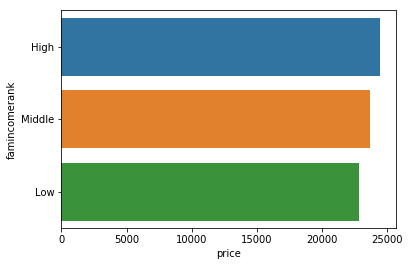

In [55]:
# how family income effect the car price
famincome.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="famincomerank", data = famincome, label="Median")

In [56]:
feature_df['famincomerank'].value_counts().sort_values(ascending = False)

Middle    243703
High       90845
Low         1042
Name: famincomerank, dtype: int64

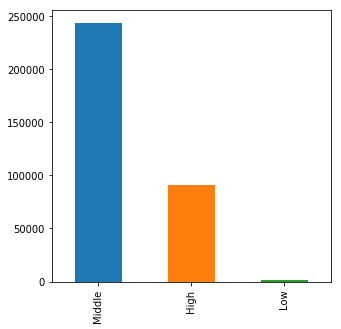

In [57]:
feature_df['famincomerank'].value_counts().plot(kind='bar', figsize=(5,5))

In [42]:
lowincome = feature_df[feature_df['Median Family income Num']<40000]
middleincome =feature_df[(feature_df['Median Family income Num']>=40000)|(feature_df['Median Family income Num']<80000)]
highincome = feature_df[feature_df['Median Family income Num']>80000]

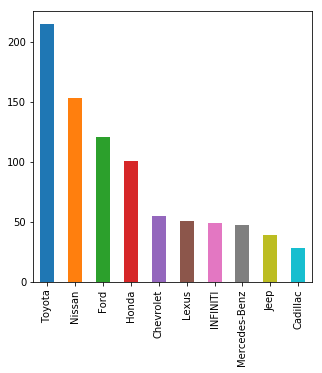

In [43]:
lowincome['make'].value_counts().head(10).plot(kind='bar', figsize=(5,5))

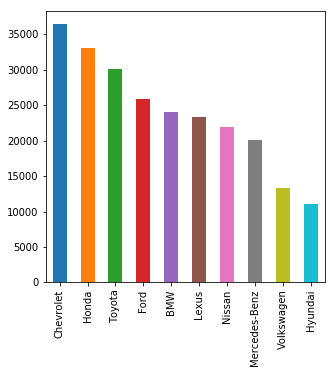

In [44]:
middleincome['make'].value_counts().head(10).plot(kind='bar', figsize=(5,5))


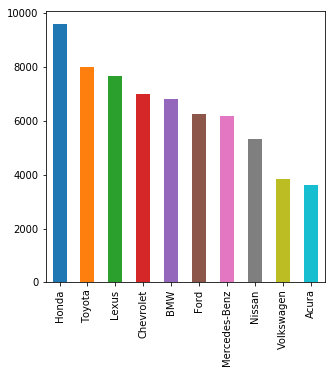

In [45]:
highincome['make'].value_counts().head(10).plot(kind='bar', figsize=(5,5))

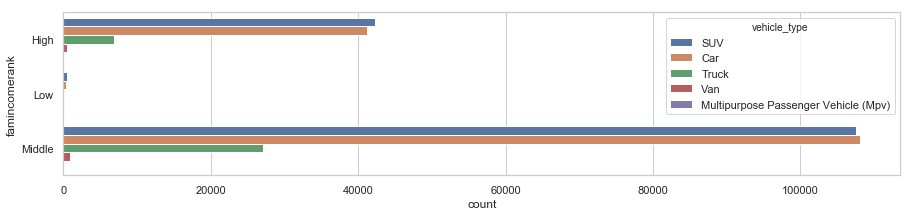

In [74]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(figsize=(15, 3))
feature_df1 = feature_df.sort_values('famincomerank', ascending=True, inplace=False)
sns.countplot(y="famincomerank", hue="vehicle_type", data=feature_df1)

### EDA4: Population and Car Price

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


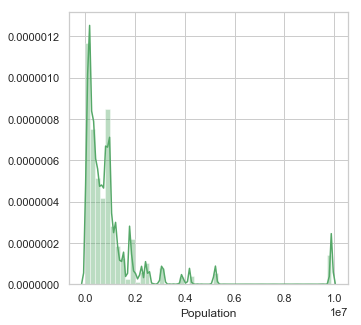

In [75]:
plt.figure(figsize=(5, 5))
sns.distplot(feature_df['Population'], color='g', bins=50)

In [85]:
feature_df['Population'].describe()

count    335590.000
mean    1083432.030
std     1730680.751
min        1794.000
25%      229850.000
50%      625977.000
75%     1065794.000
max     9893481.000
Name: Population, dtype: float64

In [86]:
feature_df['populationsize']= np.where((feature_df1['Population']<100000),'Small',
                                        #np.where((feature_df1['Population']>200000) & (feature_df1['Population']<=400000),'Middle',
                                                 'Large')

In [87]:
population = pd.DataFrame(feature_df.groupby('populationsize').median())
population = population.reset_index()

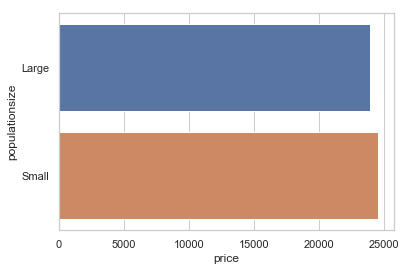

In [89]:
famincome.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="populationsize", data =population , label="Median")

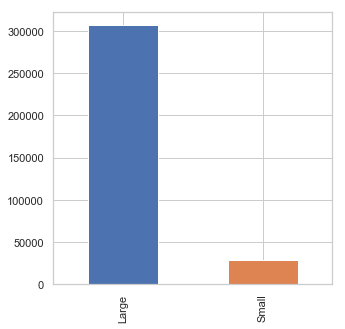

In [88]:
feature_df['populationsize'].value_counts().plot(kind='bar', figsize=(5,5))

In [95]:
feature_df.head(10)

,vin,price,miles,year,make,model,trim,vehicle_type,body_type,drivetrain,fuel_type,engine,engine_size,transmission,doors,cylinders,interior_color,exterior_color,scraped_at,status_date,zip,is_certified,dom,dom_180,msrp,dom_active,Rank,County,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,States Short,States,Regions,type,decommissioned,primary_city,state,county,timezone,latitude,longitude,irs_estimated_population_2015,county full,YEAR,AGE,Median Family income Num,Per Capita income Num,Median Household income Num,famincomerank,populationsize,is_newer
0,1GTP6DE12G1234957,31500.000,44360.000,2016.000,GMC,Canyon,SLT,Truck,Pickup,4-Wheel Drive,Diesel,2.8L L4 DOHC 24V TURBO DIESEL,2.800,Automatic,4.000,4.000,JET BLACK,Summit White,2018-09-13T10:24:47Z,2018-11-10T05:16:06Z,64730,1.000,89,13,34852.000,0,2079,Bates,MO,"$21,047.00","$38,579.00","$50,469.00",16878,6832,Missouri,MO,Missouri,MidWest,STANDARD,0,Butler,MO,Bates,America/Chicago,38.250,-94.330,5800,Bates County,2016,3,50469.000,21047.000,38579.000,Middle,Large,1
1,2C3CCAKG3GH325272,22500.000,35195.000,2016.000,Chrysler,300,C,Car,Sedan,All Wheel Drive,Regular Unleaded,3.6L V6 SOHC 24V,3.600,Automatic,4.000,6.000,BLACK,Billet Silver Metallic Clearcoat,2018-10-25T14:21:05Z,2018-11-10T05:19:43Z,64730,1.000,138,70,22500.000,70,2079,Bates,MO,"$21,047.00","$38,579.00","$50,469.00",16878,6832,Missouri,MO,Missouri,MidWest,STANDARD,0,Butler,MO,Bates,America/Chicago,38.250,-94.330,5800,Bates County,2016,3,50469.000,21047.000,38579.000,Middle,Large,1
2,JTDKARFU6G3504811,21600.000,16513.000,2016.000,Toyota,Prius,Four,Car,Hatchback,Front Wheel Drive,Regular Unleaded,1.8L L4 DOHC 16V HYBRID,1.800,Automatic,4.000,4.000,MOONSTONE,White,2018-10-21T08:38:22Z,2018-11-10T16:11:40Z,43110,1.000,60,22,21600.000,22,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,Middle,Large,1
3,5J6RM4H97GL054923,26057.000,25162.000,2016.000,Honda,CR-V,Touring,SUV,SUV,All Wheel Drive,Regular Unleaded,2.4L L4 DOHC 16V,2.400,Automatic,4.000,4.000,Black,White Diamond Pearl,2018-10-30T06:44:29Z,2018-11-10T16:50:53Z,43110,1.000,152,73,26057.000,73,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,Middle,Large,1
4,1G11C5SA1GF111025,15475.000,32865.000,2016.000,Chevrolet,Malibu Limited,LT,Car,Sedan,Front Wheel Drive,Regular Unleaded,2.5L L4 DOHC 16V,2.500,Automatic,4.000,4.000,JET BLACK,Silver Ice,2018-10-20T04:54:05Z,2018-11-10T17:36:51Z,43110,1.000,23,23,15475.000,23,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,Middle,Large,1
5,1C6RR7NM4GS344082,33819.000,39916.000,2016.000,Ram,1500,Laramie,Truck,Pickup,4-Wheel Drive,Diesel,3.0L V6 DIESEL,3.000,Automatic,4.000,6.000,BLACK,Brilliant Black Crystal Pearlcoat,2018-10-22T06:13:37Z,2018-11-10T17:37:01Z,43110,1.000,40,21,33819.000,21,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,Middle,Large,1
6,KM8SM4HF6GU147743,20700.000,42930.000,2016.000,Hyundai,Santa Fe,SE,SUV,SUV,Front Wheel Drive,Regular Unleaded,3.3L V6 DOHC 24V,3.300,Automatic,4.000,6.000,GRAY,Becketts Black,2018-10-18T00:06:25Z,2018-11-10T16:36:30Z,43110,1.000,28,25,20700.000,25,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Frankli

### EDA5 : Number of HouseHold and Car Price

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


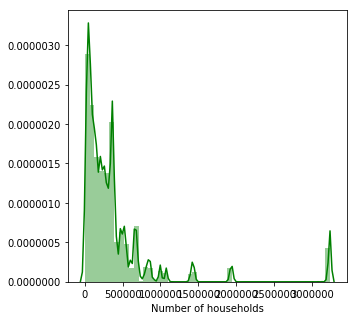

In [10]:
plt.figure(figsize=(5, 5))
sns.distplot(feature_df['Number of households'], color='g', bins=50)

In [11]:
feature_df['Number of households'].describe()

count    336511.000
mean     386393.929
std      574393.384
min         760.000
25%       86483.000
50%      230366.000
75%      389908.000
max     3230383.000
Name: Number of households, dtype: float64

In [20]:
feature_df['households']= np.where((feature_df['Number of households']<350000),'Small',
                                        np.where((feature_df['Number of households']>=350000) & (feature_df['Number of households']< 389908),'Middle',
                                                 'Large'))
                                

In [26]:
households = pd.DataFrame(feature_df.groupby('households').median())
households = households.reset_index()

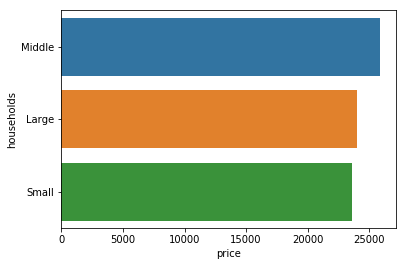

In [28]:
households.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="households", data =households , label="Median")

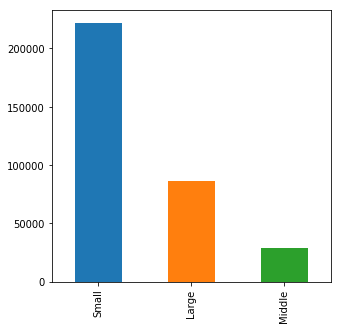

In [29]:
feature_df['households'].value_counts().plot(kind='bar', figsize=(5,5))

In [30]:
smallhouseholds = feature_df[feature_df['Number of households']<350000]

In [31]:
middlehouseholds = feature_df[(feature_df['Number of households']>=350000)|(feature_df['Number of households']< 389908)]

In [32]:
highhouseholds =feature_df[feature_df['Number of households']>= 389908]

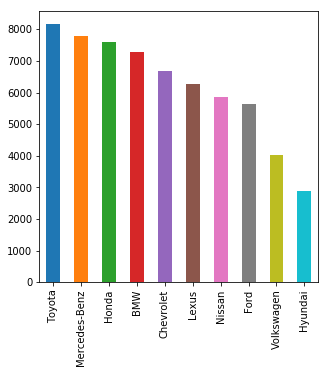

In [34]:
highhouseholds['make'].value_counts().head(10).plot(kind='bar', figsize=(5,5))

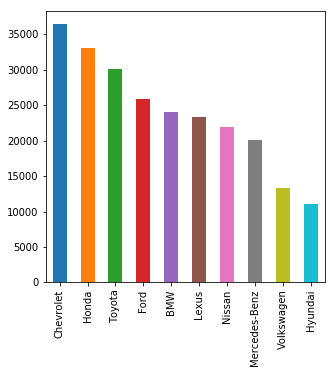

In [35]:
middlehouseholds['make'].value_counts().head(10).plot(kind='bar', figsize=(5,5))

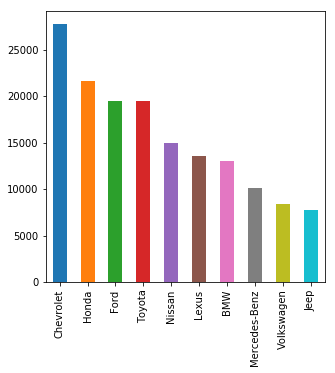

In [36]:
smallhouseholds['make'].value_counts().head(10).plot(kind='bar', figsize=(5,5))

### EDA4: Age of Car Distribution and Analysis

In [29]:
# Adding new features...Create Category for New Car and Old Cars
feature_df['is_newer'] = np.where(feature_df['AGE']<10,1,0)

In [30]:
feature_df.head()

,vin,price,miles,year,make,model,trim,vehicle_type,body_type,drivetrain,fuel_type,engine,engine_size,transmission,doors,cylinders,interior_color,exterior_color,scraped_at,status_date,zip,is_certified,dom,dom_180,msrp,dom_active,Rank,County,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,States Short,States,Regions,type,decommissioned,primary_city,state,county,timezone,latitude,longitude,irs_estimated_population_2015,county full,YEAR,AGE,Median Family income Num,Per Capita income Num,Median Household income Num,is_newer
0,1GTP6DE12G1234957,31500.000,44360.000,2016.000,GMC,Canyon,SLT,Truck,Pickup,4-Wheel Drive,Diesel,2.8L L4 DOHC 24V TURBO DIESEL,2.800,Automatic,4.000,4.000,JET BLACK,Summit White,2018-09-13T10:24:47Z,2018-11-10T05:16:06Z,64730,1.000,89,13,34852.000,0,2079,Bates,MO,"$21,047.00","$38,579.00","$50,469.00",16878,6832,Missouri,MO,Missouri,MidWest,STANDARD,0,Butler,MO,Bates,America/Chicago,38.250,-94.330,5800,Bates County,2016,3,50469.000,21047.000,38579.000,1
1,2C3CCAKG3GH325272,22500.000,35195.000,2016.000,Chrysler,300,C,Car,Sedan,All Wheel Drive,Regular Unleaded,3.6L V6 SOHC 24V,3.600,Automatic,4.000,6.000,BLACK,Billet Silver Metallic Clearcoat,2018-10-25T14:21:05Z,2018-11-10T05:19:43Z,64730,1.000,138,70,22500.000,70,2079,Bates,MO,"$21,047.00","$38,579.00","$50,469.00",16878,6832,Missouri,MO,Missouri,MidWest,STANDARD,0,Butler,MO,Bates,America/Chicago,38.250,-94.330,5800,Bates County,2016,3,50469.000,21047.000,38579.000,1
2,JTDKARFU6G3504811,21600.000,16513.000,2016.000,Toyota,Prius,Four,Car,Hatchback,Front Wheel Drive,Regular Unleaded,1.8L L4 DOHC 16V HYBRID,1.800,Automatic,4.000,4.000,MOONSTONE,White,2018-10-21T08:38:22Z,2018-11-10T16:11:40Z,43110,1.000,60,22,21600.000,22,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,1
3,5J6RM4H97GL054923,26057.000,25162.000,2016.000,Honda,CR-V,Touring,SUV,SUV,All Wheel Drive,Regular Unleaded,2.4L L4 DOHC 16V,2.400,Automatic,4.000,4.000,Black,White Diamond Pearl,2018-10-30T06:44:29Z,2018-11-10T16:50:53Z,43110,1.000,152,73,26057.000,73,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,1
4,1G11C5SA1GF111025,15475.000,32865.000,2016.000,Chevrolet,Malibu Limited,LT,Car,Sedan,Front Wheel Drive,Regular Unleaded,2.5L L4 DOHC 16V,2.500,Automatic,4.000,4.000,JET BLACK,Silver Ice,2018-10-20T04:54:05Z,2018-11-10T17:36:51Z,43110,1.000,23,23,15475.000,23,461,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824,468295,Ohio,OH,Ohio,MidWest,STANDARD,0,Canal Winchester,OH,Franklin County,America/New_York,39.840,-82.820,34950,Franklin County,2016,3,64693.000,28283.000,50877.000,1


In [33]:
feature_df['is_newer'].dtype

dtype('int32')

In [34]:
df_num_age = feature_df.select_dtypes(include = ['float64', 'int64','int32'])
df_num_age.head()

,price,miles,year,engine_size,doors,cylinders,zip,is_certified,dom,dom_180,msrp,dom_active,Rank,Population,Number of households,decommissioned,latitude,longitude,irs_estimated_population_2015,YEAR,AGE,Median Family income Num,Per Capita income Num,Median Household income Num,is_newer
0,31500.000,44360.000,2016.000,2.800,4.000,4.000,64730,1.000,89,13,34852.000,0,2079,16878,6832,0,38.250,-94.330,5800,2016,3,50469.000,21047.000,38579.000,1
1,22500.000,35195.000,2016.000,3.600,4.000,6.000,64730,1.000,138,70,22500.000,70,2079,16878,6832,0,38.250,-94.330,5800,2016,3,50469.000,21047.000,38579.000,1
2,21600.000,16513.000,2016.000,1.800,4.000,4.000,43110,1.000,60,22,21600.000,22,461,1181824,468295,0,39.840,-82.820,34950,2016,3,64693.000,28283.000,50877.000,1
3,26057.000,25162.000,2016.000,2.400,4.000,4.000,43110,1.000,152,73,26057.000,73,461,1181824,468295,0,39.840,-82.820,34950,2016,3,64693.000,28283.000,50877.000,1
4,15475.000,32865.000,2016.000,2.500,4.000,4.000,43110,1.000,23,23,15475.000,23,461,1181824,468295,0,39.840,-82.820,34950,2016,3,64693.000,28283.000,50877.000,1


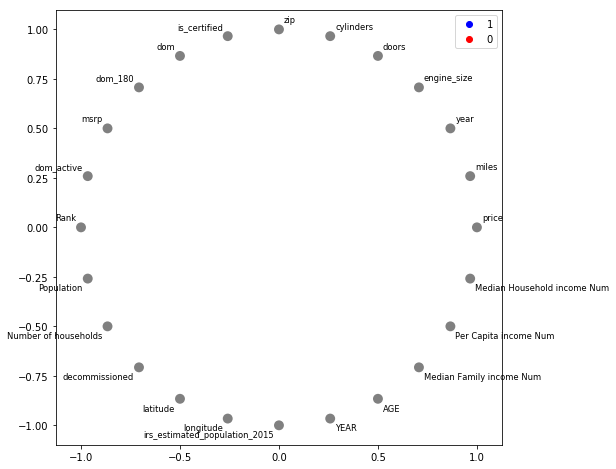

In [36]:
from pandas.plotting import radviz
plt.figure(figsize=(8,8))
radviz(df_num_age, 'is_newer',color=['blue','red'])
plt.show()

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


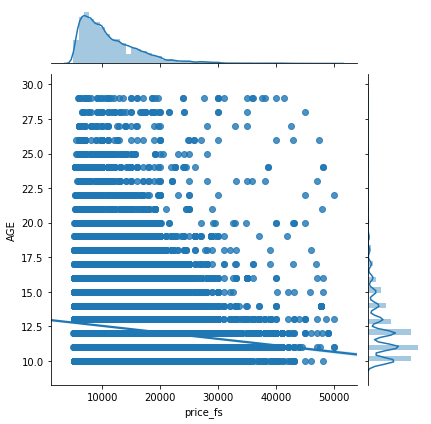

In [113]:
oldercar = df_num2[df_num2['is_newer']==0]
sns.jointplot(data=oldercar,x='price_fs',y='AGE',kind='reg')

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


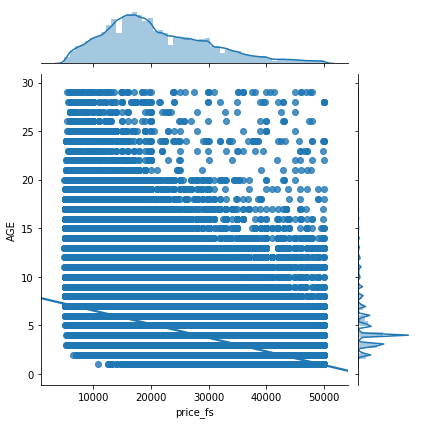

In [38]:
sns.jointplot(data=df_num,x='price_fs',y='AGE',kind='reg')

In [25]:
#smallhouseholds = feature_df[feature_df['Number of households']<350000]
plotdata = feature_df[feature_df['price']<400000] 

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


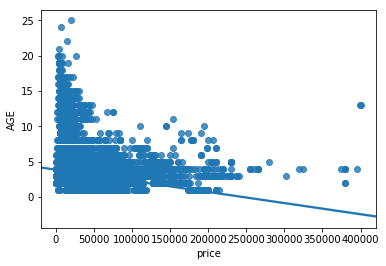

In [26]:
# use the function regplot to make a scatterplot
sns.regplot(y=plotdata["AGE"], x=plotdata["price"])

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


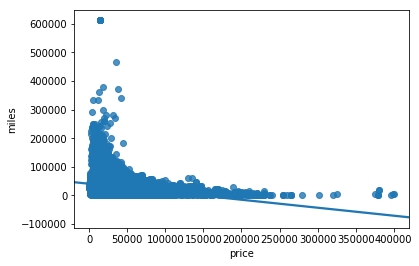

In [27]:
sns.regplot(y=plotdata["miles"], x=plotdata["price"])

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


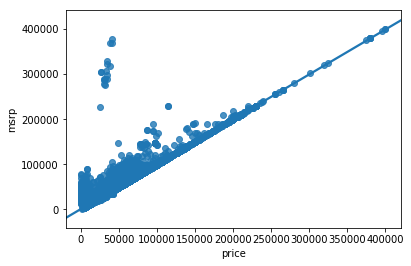

In [28]:
sns.regplot(y=plotdata["msrp"], x=plotdata["price"])

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


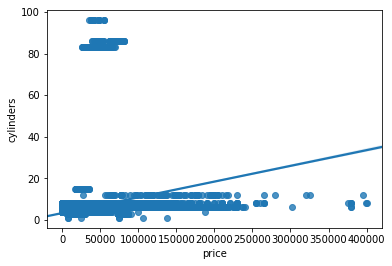

In [38]:
sns.regplot(y=plotdata["cylinders"], x=plotdata["price"])